In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
with open ("C:\\Users\\Arkateks\\Desktop\\BrainStation Files\\Capstone\\spotify_million_playlist_dataset\\data\\mpd.slice.2000-2999.json") as json_file:
    spotify_data = json.load(json_file)

In [3]:
dict = {}

artists_names =[]

for i in range(0,1000):
    dict[i] = artists_names
    j = len(spotify_data["playlists"][i]["tracks"])
    artists_names = []
    for n in range(j):
        artists_names.append(spotify_data["playlists"][i]["tracks"][n]["artist_name"])

In [4]:
from collections import Counter

artists_cnt = []

for i in range(0,1000):
    artists_title = Counter(dict[i])
    artists_cnt.append(artists_title)

In [5]:
del artists_cnt[0]


In [6]:
from sklearn.feature_extraction import DictVectorizer

v = DictVectorizer()
v.fit(artists_cnt)

surprise_trial = v.transform(artists_cnt)
surprise_trial

names = v.get_feature_names()

In [7]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
df = pd.DataFrame(columns=v.get_feature_names(), data=artists_cnt)
display(df)

,!!!,"""Weird Al"" Yankovic",$teven Cannon,$uicideBoy$,'Til Tuesday,(Hed) P.E.,(Sandy) Alex G,*NSYNC,070,070 Shake,...,Сати Казанова,שירי מימון,レヴェル42,王錚亮,葛蘭,阿姣,박동일,박보영,최가람,태양
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
playlist_997 = df.loc[997, :]
Counter(playlist_997[playlist_997.notna()].to_dict()) == artists_cnt[997]

True

In [9]:
playlist_num = []
artist = []
rating = []
for i, counter in enumerate(artists_cnt):
    for key, value in counter.items():
        playlist_num.append(i)
        artist.append(key)
        rating.append(value)

In [10]:
a_dict = {"Playlist":playlist_num, "Artist":artist, "Rating":rating}
df_trial = pd.DataFrame(a_dict)
df_trial

,Playlist,Artist,Rating
0,0,The Jackson 5,1
1,0,Streetlight Manifesto,1
2,0,Michael Jackson,1
3,0,Green Day,1
4,0,The White Stripes,1
...,...,...,...
37701,998,Jon Bellion,1
37702,998,Florida Georgia Line,1
37703,998,Dan Seals,1
37704,998,Ronnie Dunn,2


In [12]:
tracks_per_playlist = []

for playlist in spotify_data["playlists"]:
    tracks_per_playlist.append(playlist["num_tracks"])

In [13]:
track_count = pd.DataFrame(tracks_per_playlist, columns = ['count'])
track_count = track_count.reset_index()
track_count

,index,count
0,0,152
1,1,11
2,2,221
3,3,35
4,4,20
...,...,...
995,995,147
996,996,24
997,997,165
998,998,158


In [14]:
df_joined = df_trial.join(track_count, on = 'Playlist')
df_joined

,Playlist,Artist,Rating,index,count
0,0,The Jackson 5,1,0,152
1,0,Streetlight Manifesto,1,0,152
2,0,Michael Jackson,1,0,152
3,0,Green Day,1,0,152
4,0,The White Stripes,1,0,152
...,...,...,...,...,...
37701,998,Jon Bellion,1,998,158
37702,998,Florida Georgia Line,1,998,158
37703,998,Dan Seals,1,998,158
37704,998,Ronnie Dunn,2,998,158


In [15]:
def weight_calc(df_joined):
    if df_joined['count'] == 5 or df_joined['count'] <= 15:
        return df_joined['Rating'] * 10
    
    elif df_joined['count'] >= 16 and df_joined['count'] <= 25:
        return df_joined['Rating'] * 9
    
    elif df_joined['count'] >= 26 and df_joined['count'] <= 40:
        return df_joined['Rating'] * 8
    
    elif df_joined['count'] >= 41 and df_joined['count'] <= 55:
        return df_joined['Rating'] * 7
    
    elif df_joined['count'] >= 56 and df_joined['count'] <= 70:
        return df_joined['Rating'] * 6
    
    elif df_joined['count'] >= 71 and df_joined['count'] <= 85:
        return df_joined['Rating'] * 5
    
    elif df_joined['count'] >= 86 and df_joined['count'] <= 100:
        return df_joined['Rating'] * 4
    
    elif df_joined['count'] >= 101 and df_joined['count'] <= 115:
        return df_joined['Rating'] * 3
    
    elif df_joined['count'] >= 116 and df_joined['count'] <= 130:
        return df_joined['Rating'] * 2
    
    else:
         return df_joined['Rating'] * 1
         

In [16]:
%%time

df_joined['weighted_score'] = df_joined.apply(weight_calc, axis=1)

Wall time: 2.16 s


In [17]:
df_joined

,Playlist,Artist,Rating,index,count,weighted_score
0,0,The Jackson 5,1,0,152,1
1,0,Streetlight Manifesto,1,0,152,1
2,0,Michael Jackson,1,0,152,1
3,0,Green Day,1,0,152,1
4,0,The White Stripes,1,0,152,1
...,...,...,...,...,...,...
37701,998,Jon Bellion,1,998,158,1
37702,998,Florida Georgia Line,1,998,158,1
37703,998,Dan Seals,1,998,158,1
37704,998,Ronnie Dunn,2,998,158,2


In [18]:
df_joined['weighted_score'].value_counts()

1      7275
8      3919
6      3508
5      3344
2      3267
       ... 
171       1
41        1
135       1
198       1
111       1
Name: weighted_score, Length: 111, dtype: int64

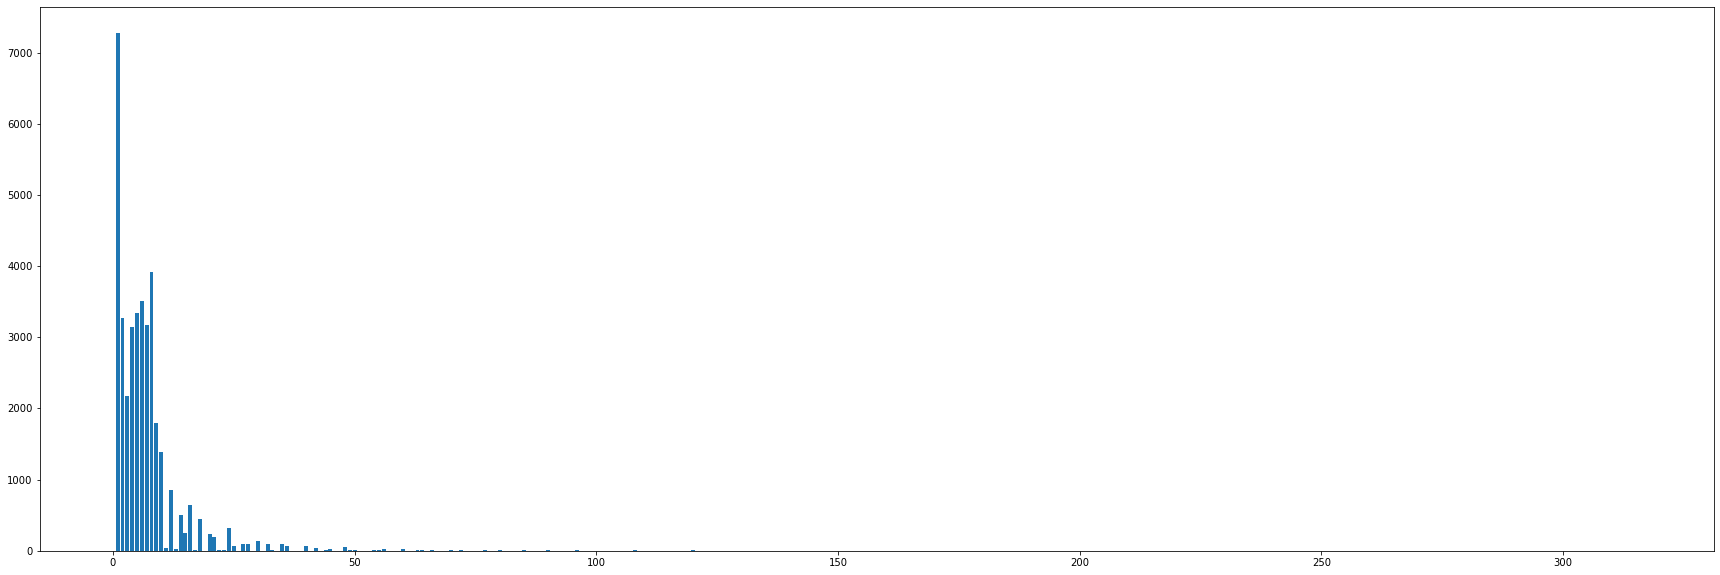

In [19]:
plt.figure(figsize = (30,10))
plt.bar(df_joined['weighted_score'].value_counts().index,df_joined['weighted_score'].value_counts())
plt.show()

In [25]:
df_joined.loc[df_joined['weighted_score'] > 10, 'weighted_score'] = 10

In [26]:
df_joined['weighted_score'].unique()

array([ 1,  3,  2,  4,  5, 10,  6,  8,  9,  7], dtype=int64)

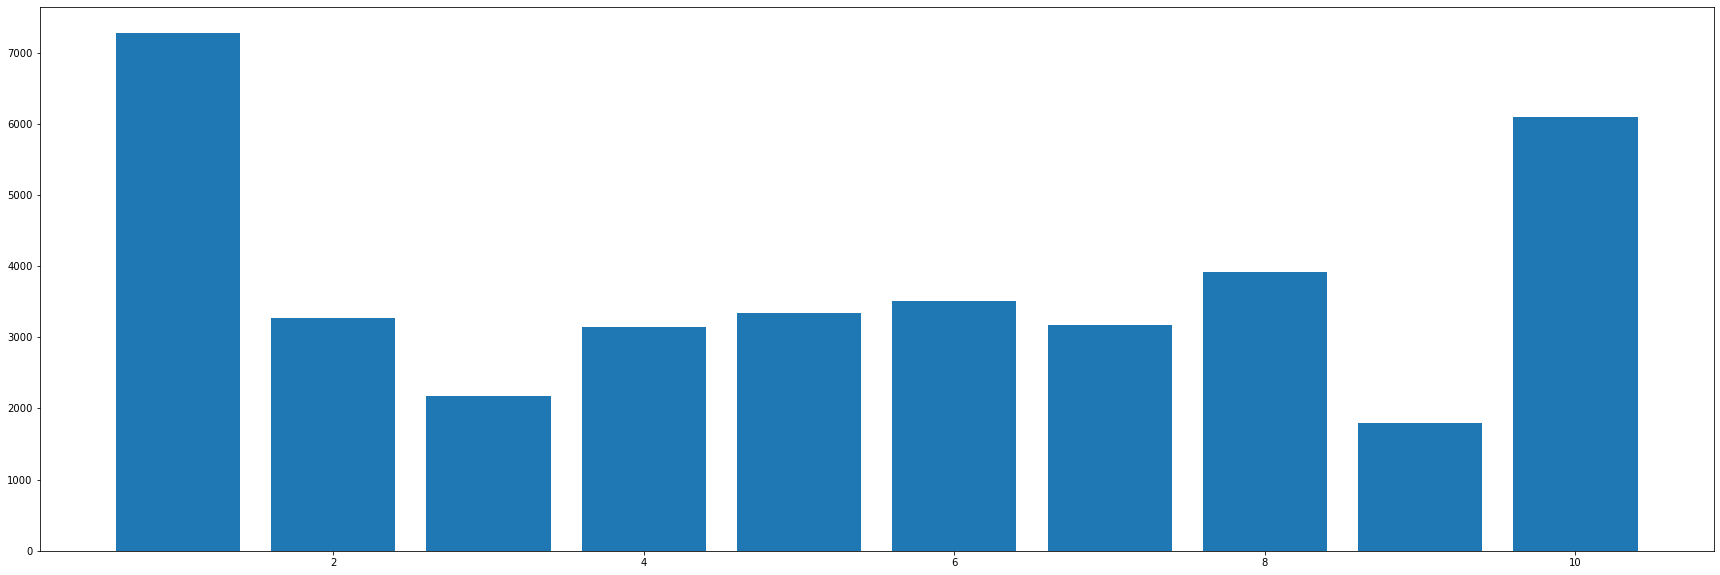

In [27]:
plt.figure(figsize = (30,10))
plt.bar(df_joined['weighted_score'].value_counts().index,df_joined['weighted_score'].value_counts())
plt.show()

In [ ]:
%%time 

min = 1
max = 10 
num_rows = len(df_joined['weighted_score'])
weighted_scaled_scores = []


for i in range(1000):
   
        for k in range(num_rows):
            std_playlist = (df_joined['weighted_score'][k]- min) / (df_joined['weighted_score'].max(axis = 0) - min)
            scaled_rating = round(std_playlist * (max - min) + min)
            weighted_scaled_scores.append(scaled_rating)

In [11]:
df_trial['Scaled_Ratings'] = scaled_scores
print(df_trial['Scaled_Ratings'].max())
print(df_trial['Scaled_Ratings'].min())

NameError: name 'scaled_scores' is not defined

In [39]:
df_joined['weighted_scaled_score'] = weighted_scaled_scores 

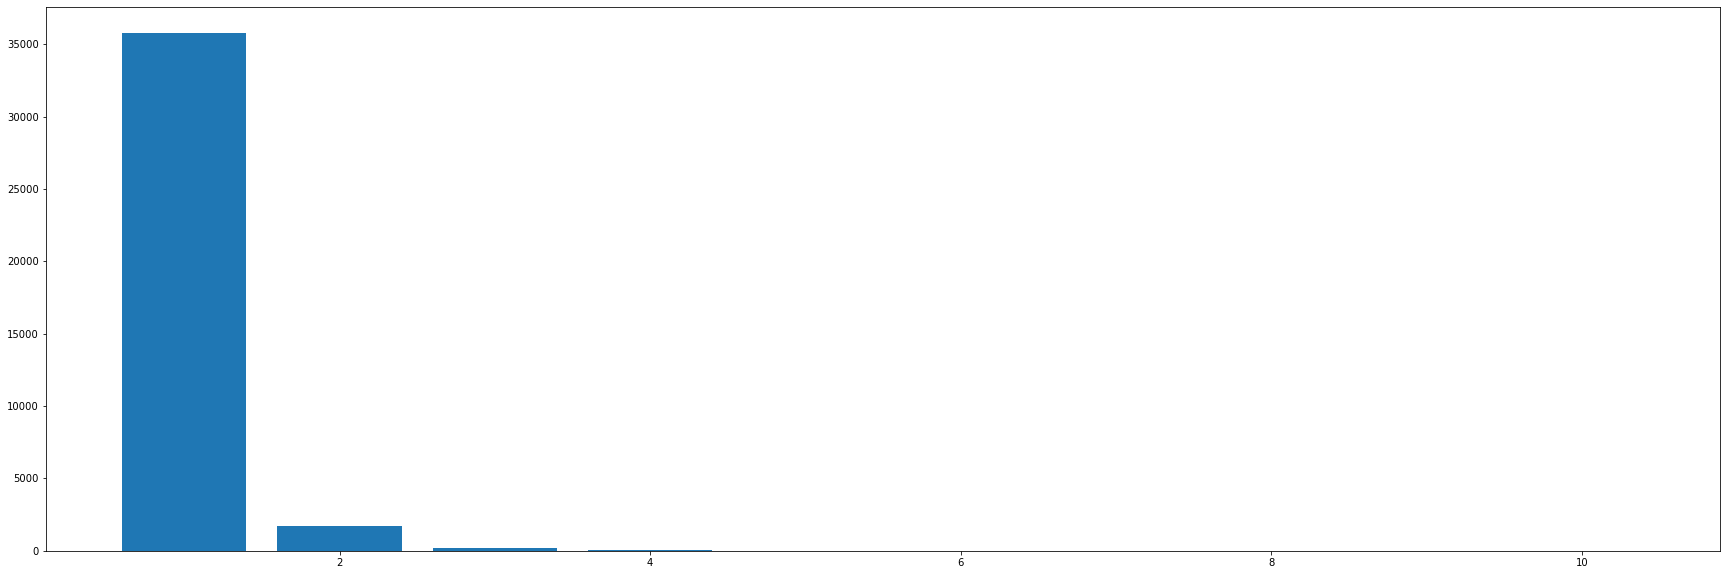

In [40]:
plt.figure(figsize = (30,10))
plt.bar(df_joined['weighted_scaled_score'].value_counts().index,df_joined['weighted_scaled_score'].value_counts())
plt.show()

In [29]:
df_joined['weighted_score'].value_counts()

1     7275
10    6102
8     3919
6     3508
5     3344
2     3267
7     3166
4     3146
3     2178
9     1801
Name: weighted_score, dtype: int64

In [35]:
df_joined = df_joined.drop(columns=['index','count','Rating'])

In [32]:
from surprise import Dataset
from surprise.reader import Reader
from surprise.prediction_algorithms.matrix_factorization import SVD as FunkSVD

In [36]:
#loading new Dataframe
data = Dataset.load_from_df(df_joined, Reader(rating_scale=(1, 10)))
train_data = data.build_full_trainset()

In [37]:
my_algorithm = FunkSVD(n_factors=10, 
                       n_epochs=110, 
                       lr_all=0.001, # Learning rate for each epoch
                       reg_all = 0.25,
                       biased=False,  # This forces the algorithm to store all latent information in the matrices
                       verbose=1)

my_algorithm.fit(train_data)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

In [43]:
my_algorithm.predict(uid = 342, iid = 'Drake')

Prediction(uid=342, iid='Drake', r_ui=None, est=6.78905406306084, details={'was_impossible': False})